In [22]:
import pandas as pd

df = pd.read_csv('survey.csv')
df.drop_duplicates(inplace=True)
print("Данные после удаления дубликатов:\n", df.head())


Данные после удаления дубликатов:
                                 user_id language platform  gender  age  q1  \
0  080c468b-27c0-455c-aa63-b8f807f2e3d7       en  Desktop    male   34   9   
1  0b0379c7-04db-4c85-84bd-a2bd55329e29       en   Mobile  female   19  10   
2  0e623280-b28b-4d4a-8eea-0732f09ed497       en   Mobile  female   19  10   
3  045dc0f3-a730-4d03-a615-f51814e5b04f       en   Mobile    male   21   5   
4  092f2ee7-5281-4a09-9bce-e5523b95b53b       en      NaN  female   53   9   

   q2  q3  q4  q5  ...  q17  q18  q19  q20  q21  q22  q23  q24  q25  q26  
0   7   6   6   7  ...    8    4    6    5    6    6    5    2    5    3  
1  10  10   9  10  ...   10   10   10   10   10   10   10   10    9    8  
2  10  10  10  10  ...    9    8   10   10   10   10    9    9    8    8  
3   8   5   5   5  ...    7    9   10    8    8   10   10    8   10    6  
4  10   9  10   9  ...    7    8    8    8    9    9   10   10   10   10  

[5 rows x 31 columns]


In [23]:
categories = {
    'q1-q5': ['q1', 'q2', 'q3', 'q4', 'q5'],
    'q6-q10': ['q6', 'q7', 'q8', 'q9', 'q10'],
    'q11-q15': ['q11', 'q12', 'q13', 'q14', 'q15'],
    'q16-q20': ['q16', 'q17', 'q18', 'q19', 'q20'],
    'q21-q25': ['q21', 'q22', 'q23', 'q24', 'q25'],
    'q26': ['q26']
}

for cols in categories.values():
    mean_value = df[cols].mean().mean()
    df[cols] = df[cols].fillna(mean_value)

print("Данные после заполнения пропущенных значений:\n", df.head())


Данные после заполнения пропущенных значений:
                                 user_id language platform  gender  age  q1  \
0  080c468b-27c0-455c-aa63-b8f807f2e3d7       en  Desktop    male   34   9   
1  0b0379c7-04db-4c85-84bd-a2bd55329e29       en   Mobile  female   19  10   
2  0e623280-b28b-4d4a-8eea-0732f09ed497       en   Mobile  female   19  10   
3  045dc0f3-a730-4d03-a615-f51814e5b04f       en   Mobile    male   21   5   
4  092f2ee7-5281-4a09-9bce-e5523b95b53b       en      NaN  female   53   9   

   q2  q3  q4  q5  ...  q17  q18  q19  q20  q21  q22  q23  q24  q25  q26  
0   7   6   6   7  ...    8    4    6    5    6    6    5    2    5    3  
1  10  10   9  10  ...   10   10   10   10   10   10   10   10    9    8  
2  10  10  10  10  ...    9    8   10   10   10   10    9    9    8    8  
3   8   5   5   5  ...    7    9   10    8    8   10   10    8   10    6  
4  10   9  10   9  ...    7    8    8    8    9    9   10   10   10   10  

[5 rows x 31 columns]


In [24]:
noisy_rows = df[df.loc[:, 'q1':'q26'].nunique(axis=1) == 1]
print("Шумные строки:\n", noisy_rows)

df = df.drop(noisy_rows.index)
print("Данные после удаления шумных строк:\n", df.head())


Шумные строки:
                                   user_id language platform  gender  age  q1  \
18   1e41998a-cda9-4b44-aa34-8bcde6752d0a       en   Mobile    male   18  10   
78   ddbc5616-edb8-4052-9186-6e105e4491f6       en   Mobile    male   20  10   
96   0b0379c7-04db-4c85-84bd-a2bd55329e29       en  Desktop    male   19   1   
97   0b0379c7-04db-4c85-84bd-a3bd55329e29       en  Desktop    male   19   2   
98   0b0379c7-04db-4c85-84bd-a4bd55329e29       en  Desktop    male   19   3   
99   0b0379c7-04db-4c85-84bd-a5bd55329e29       en  Desktop    male   19   4   
100  0b0379c7-04db-4c85-84bd-a6bd55329e29       en  Desktop  female   19   5   
101  0b0379c7-04db-4c85-84bd-a7bd55329e29       en  Desktop    male   19   6   
102  0b0379c7-04db-4c85-84bd-a8bd55329e29       en   Mobile  female   19   7   
103  0b0379c7-04db-4c85-84bd-a9bd55329e29       en   Mobile    male   19   8   
104  0b0379c7-04db-4c85-84bd-a2bd45329e29       en   Mobile  female   19   9   
105  0b0379c7-04db-4c85-

In [25]:
for col in df.columns[5:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=df.columns[5:])
print("Данные после преобразования значений в числовые и удаления строк с NaN:\n", df.head())


Данные после преобразования значений в числовые и удаления строк с NaN:
                                 user_id language platform  gender  age  q1  \
0  080c468b-27c0-455c-aa63-b8f807f2e3d7       en  Desktop    male   34   9   
1  0b0379c7-04db-4c85-84bd-a2bd55329e29       en   Mobile  female   19  10   
2  0e623280-b28b-4d4a-8eea-0732f09ed497       en   Mobile  female   19  10   
3  045dc0f3-a730-4d03-a615-f51814e5b04f       en   Mobile    male   21   5   
4  092f2ee7-5281-4a09-9bce-e5523b95b53b       en      NaN  female   53   9   

   q2  q3  q4  q5  ...  q17  q18  q19  q20  q21  q22  q23  q24  q25  q26  
0   7   6   6   7  ...    8    4    6    5    6    6    5    2    5    3  
1  10  10   9  10  ...   10   10   10   10   10   10   10   10    9    8  
2  10  10  10  10  ...    9    8   10   10   10   10    9    9    8    8  
3   8   5   5   5  ...    7    9   10    8    8   10   10    8   10    6  
4  10   9  10   9  ...    7    8    8    8    9    9   10   10   10   10  

[5 rows

In [26]:
mean_scores = df.loc[:, 'q1':'q26'].mean()
print("Средние оценки:\n", mean_scores)

median_scores = df.loc[:, 'q1':'q26'].median()
print("Медианные оценки:\n", median_scores)

best_category = mean_scores.idxmax()
worst_category = mean_scores.idxmin()
print(f"Лучшая категория: {best_category}, Худшая категория: {worst_category}")

best_median_category = median_scores.idxmax()
worst_median_category = median_scores.idxmin()
print(f"Лучшая медианная категория: {best_median_category}, Худшая медианная категория: {worst_median_category}")


Средние оценки:
 q1     7.957746
q2     7.802817
q3     7.760563
q4     7.338028
q5     7.436620
q6     7.577465
q7     7.563380
q8     7.535211
q9     6.985915
q10    6.338028
q11    6.971831
q12    6.774648
q13    7.464789
q14    7.619718
q15    7.507042
q16    6.957746
q17    8.014085
q18    7.380282
q19    7.394366
q20    7.338028
q21    7.521127
q22    7.746479
q23    7.492958
q24    7.408451
q25    7.492958
q26    7.253521
dtype: float64
Медианные оценки:
 q1     9.0
q2     8.0
q3     9.0
q4     8.0
q5     8.0
q6     8.0
q7     8.0
q8     8.0
q9     7.0
q10    6.0
q11    7.0
q12    7.0
q13    8.0
q14    8.0
q15    8.0
q16    7.0
q17    8.0
q18    8.0
q19    8.0
q20    8.0
q21    8.0
q22    8.0
q23    8.0
q24    8.0
q25    8.0
q26    8.0
dtype: float64
Лучшая категория: q17, Худшая категория: q10
Лучшая медианная категория: q1, Худшая медианная категория: q10


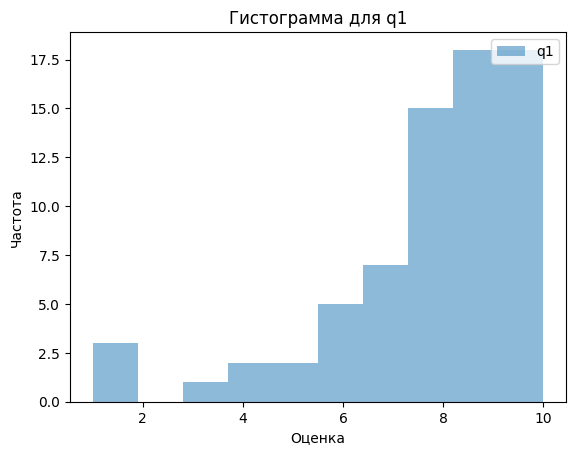

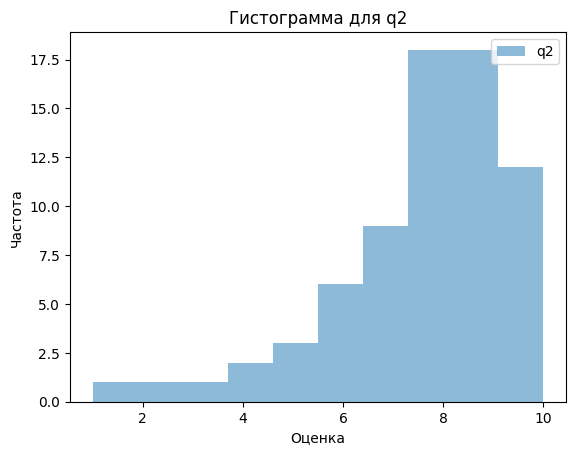

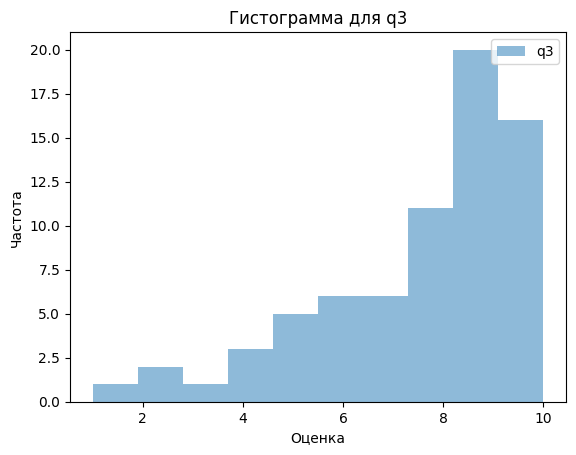

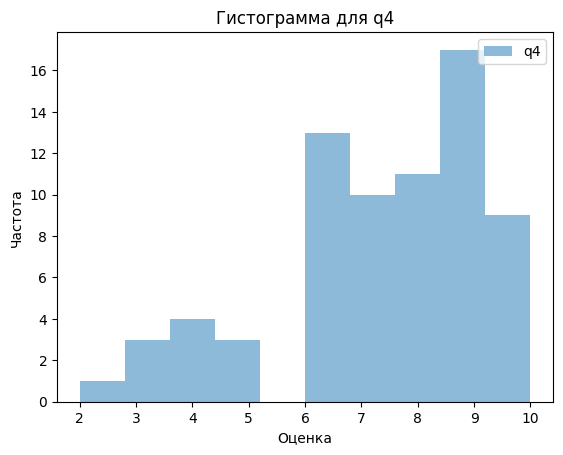

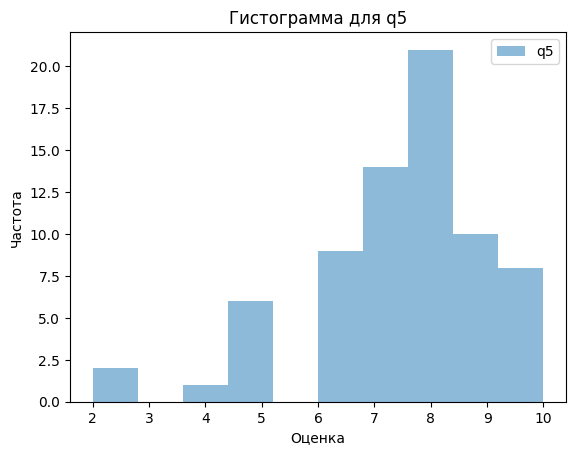

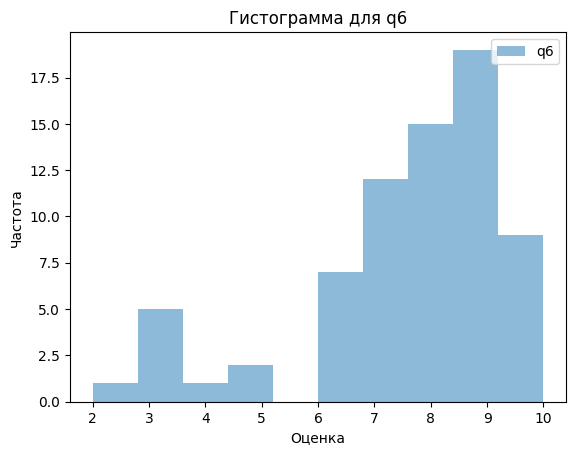

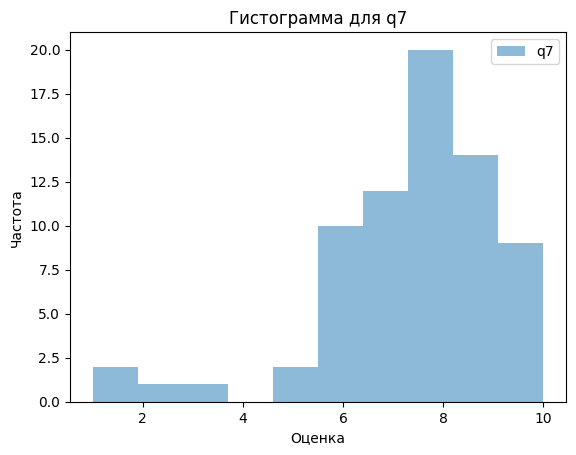

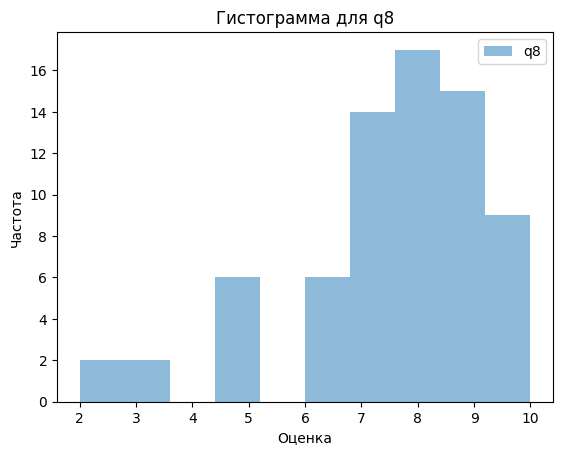

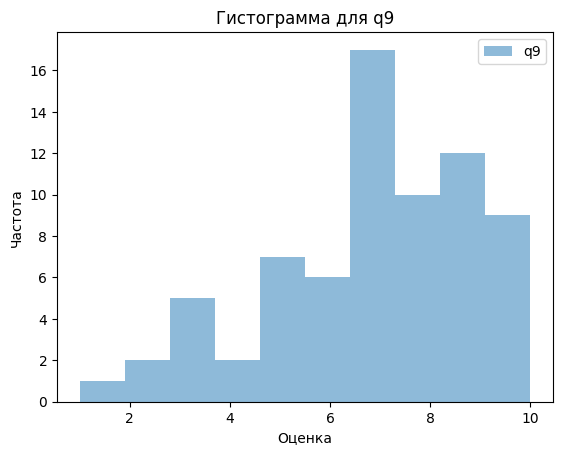

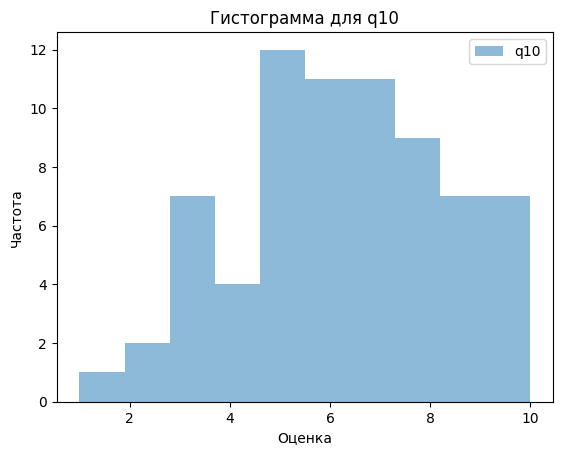

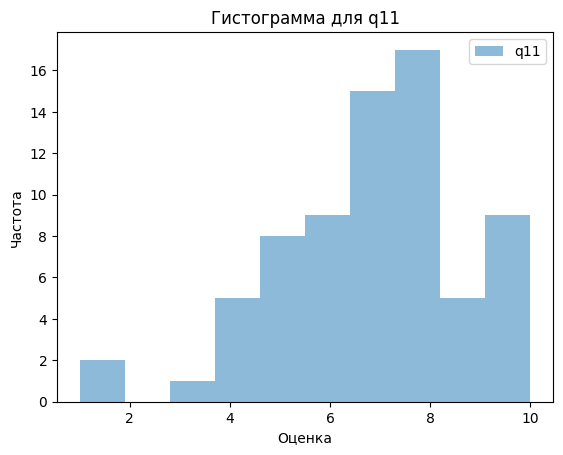

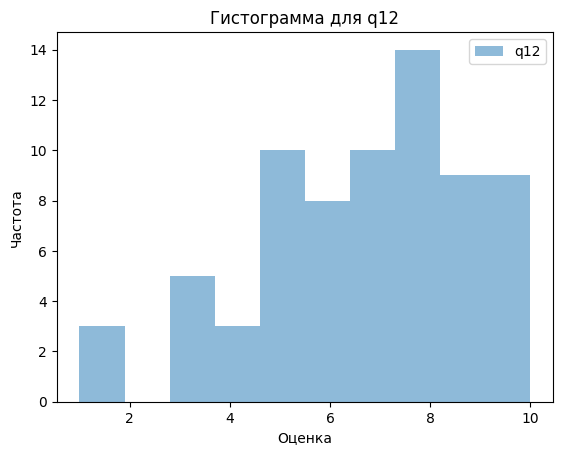

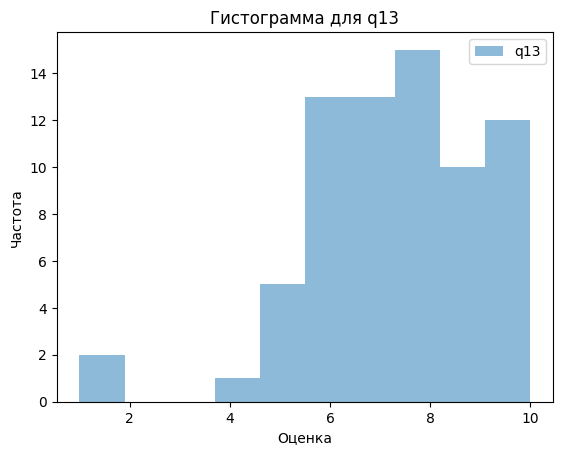

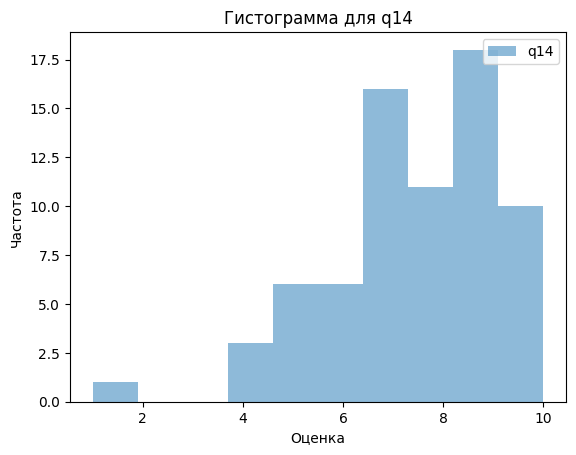

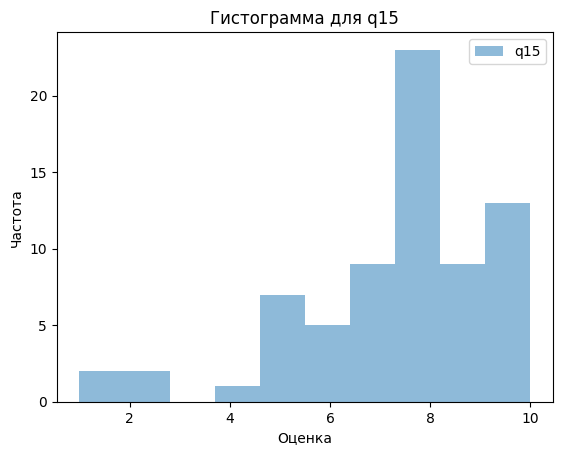

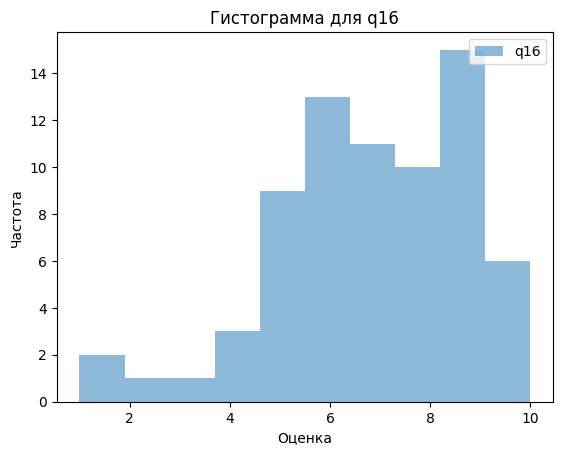

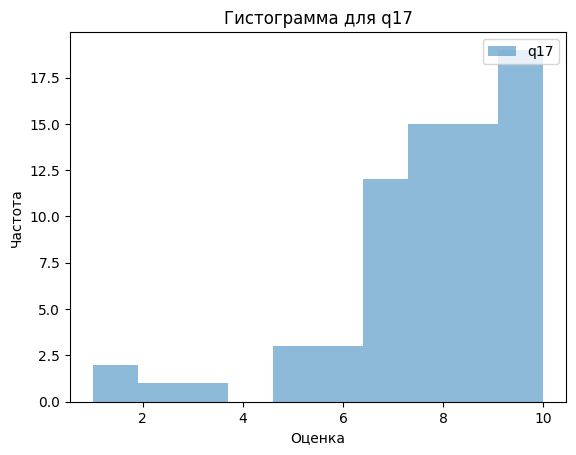

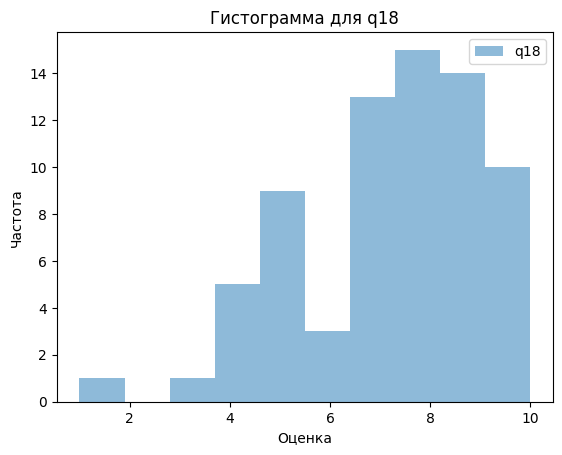

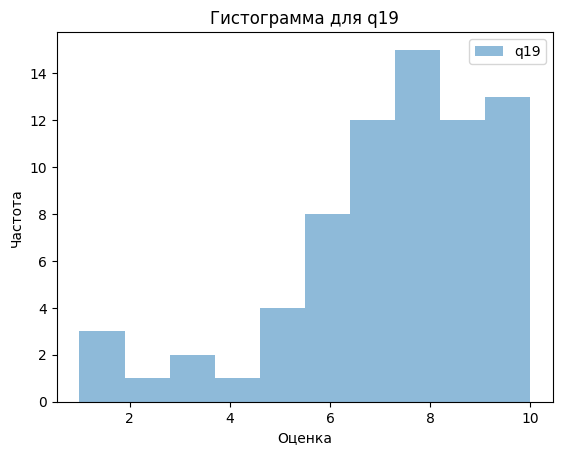

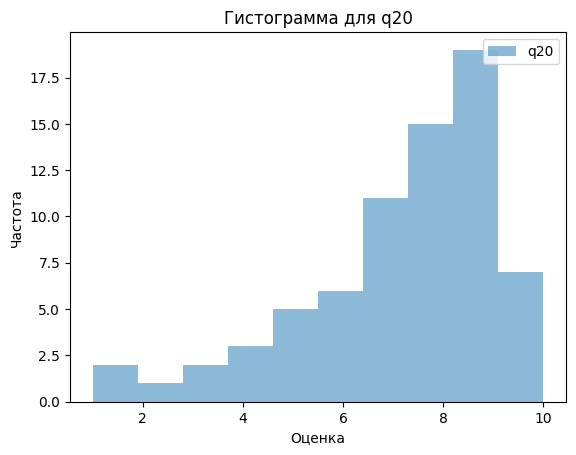

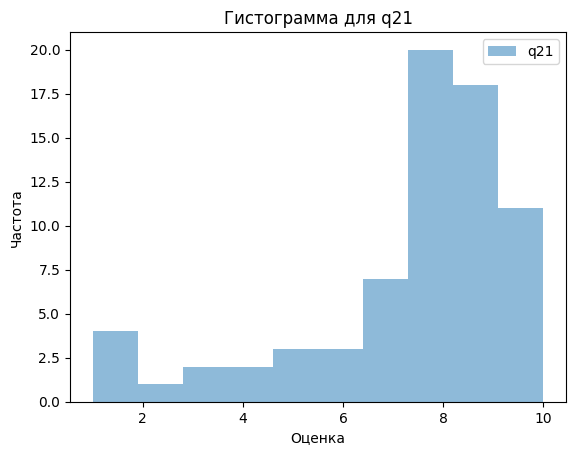

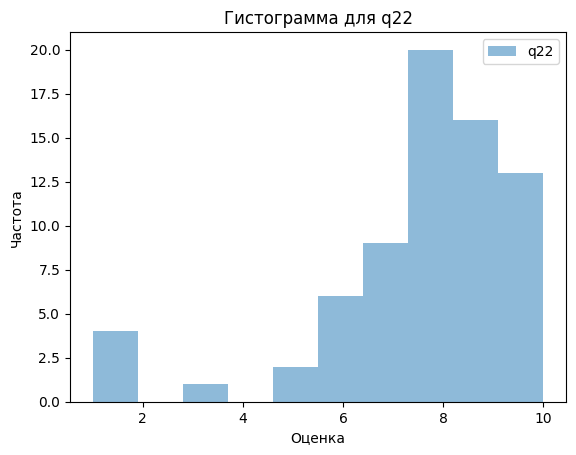

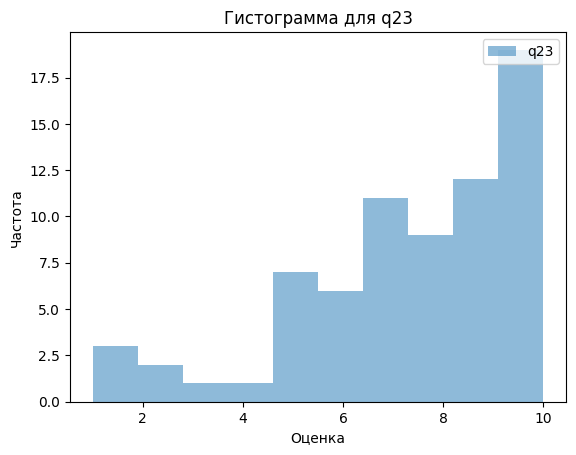

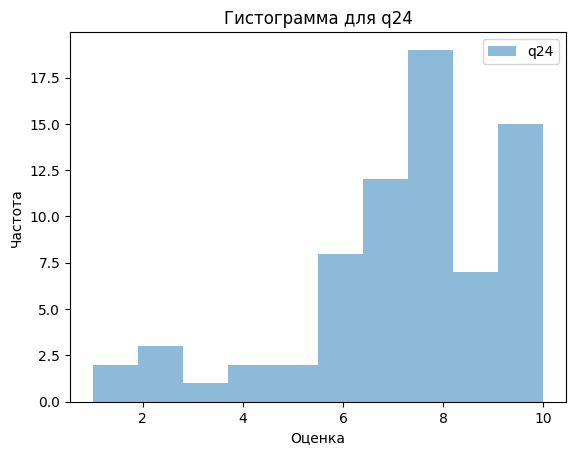

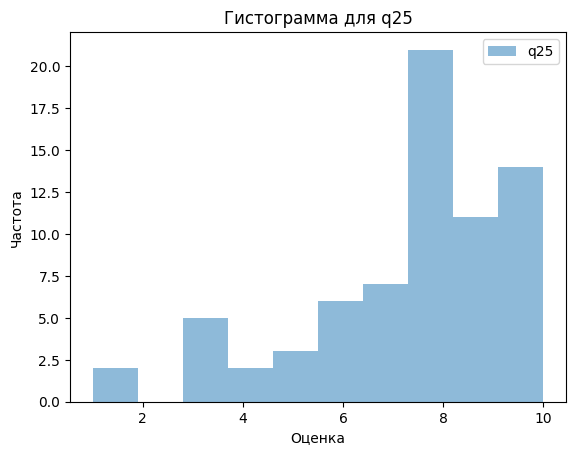

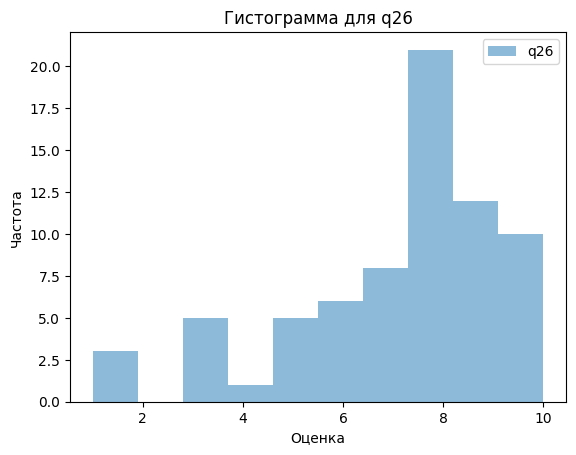

In [27]:
import matplotlib.pyplot as plt

for col in df.columns[5:]:
    plt.hist(df[col], bins=10, alpha=0.5, label=col)
    plt.title(f'Гистограмма для {col}')
    plt.xlabel('Оценка')
    plt.ylabel('Частота')
    plt.legend(loc='upper right')
    plt.show()


In [29]:
trust_cols = ['q1', 'q2', 'q3', 'q4', 'q5']
loyalty_cols = ['q21', 'q22', 'q23', 'q24', 'q25']

trust_scores = df[trust_cols].mean(axis=1)
loyalty_scores = df[loyalty_cols].mean(axis=1)

correlation = trust_scores.corr(loyalty_scores)
print(f"Корреляция между доверием и лояльностью: {correlation}")


Корреляция между доверием и лояльностью: 0.46569654382940456


Количество пользователей, принявших участие в опросе: 71
Процентное соотношение по платформам:
 platform
Mobile     73.239437
Desktop    15.492958
Name: count, dtype: float64
Процентное соотношение по полу:
 gender
male      60.563380
female    36.619718
other      2.816901
Name: count, dtype: float64


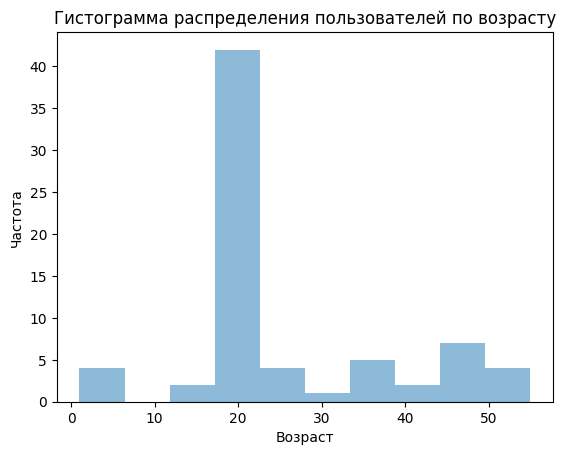

Медианный возраст опрошенных: 20.0
Лучшая категория: q17, Худшая категория: q10
Лучшая медианная категория: q1, Худшая медианная категория: q10


In [30]:
total_users = df.shape[0]
print(f"Количество пользователей, принявших участие в опросе: {total_users}")

platform_counts = df['platform'].value_counts()
platform_percentages = platform_counts / total_users * 100
print("Процентное соотношение по платформам:\n", platform_percentages)

gender_counts = df['gender'].value_counts()
gender_percentages = gender_counts / total_users * 100
print("Процентное соотношение по полу:\n", gender_percentages)

plt.hist(df['age'], bins=10, alpha=0.5)
plt.title('Гистограмма распределения пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

median_age = df['age'].median()
print(f"Медианный возраст опрошенных: {median_age}")

print(f"Лучшая категория: {best_category}, Худшая категория: {worst_category}")
print(f"Лучшая медианная категория: {best_median_category}, Худшая медианная категория: {worst_median_category}")
